In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# BLAST

In [59]:
chr_map = pd.read_csv("mouse_chr_mapping.tsv", sep = "\t", header = None, names = ["dname", "chr"])
chr_map.head()

,dname,chr
0,NC_000067.7,1
1,NC_000068.8,2
2,NC_000069.7,3
3,NC_000070.7,4
4,NC_000071.7,5


In [60]:
entropy_missed = pd.read_csv("blast_e10_k16_vs_e0.0267_false_positives.length", header=None)
entropy_missed.columns = ["len"]
entropy_missed.len = np.abs(entropy_missed.len)
entropy_missed.head()

,len
0,37
1,20
2,25
3,25
4,25


In [70]:
false_pos_gff = pd.read_csv("dream_stellar_e0.0267_truth.missing.tsv", sep = "\t", header = None)
false_pos_gff.drop([4, 7, 8], axis = 1, inplace = True) 
false_pos_gff.columns = ["dname", "begin", "end", "percid", "evalue", "qname"]
false_pos_gff["len"] = np.abs(false_pos_gff["end"] - false_pos_gff["begin"])
false_pos_gff = pd.merge(false_pos_gff, chr_map, how="left", on = ["dname"])
false_pos_gff.percid = false_pos_gff.percid.astype(float)
false_pos_gff.head()

,dname,begin,end,percid,evalue,qname,len,chr
0,NC_000067.7,999354,999317,86.842,3.6,211000022280676,37,1
1,NC_000067.7,1284442,1284422,100.000,3.8,211000022278286,20,1
2,NC_000067.7,1809881,1809856,92.308,9.7,211000022278956,25,1
3,NC_000067.7,1809881,1809856,92.308,9.5,211000022279195,25,1
4,NC_000067.7,2225885,2225910,96.154,2.5,211000022278273,25,1


In [71]:
false_pos_gff[false_pos_gff["len"] == np.max(false_pos_gff["len"])]

,dname,begin,end,percid,evalue,qname,len,chr
80368,NC_000071.7,125462998,125465106,84.477,0.0,3L,2108,5


In [75]:
false_pos_gff[(false_pos_gff.len > 150) & (false_pos_gff.percid > 97.33)]

,dname,begin,end,percid,evalue,qname,len,chr


In [4]:
np.sum(entropy_missed.len) / len(entropy_missed.len)

45.55202873477032

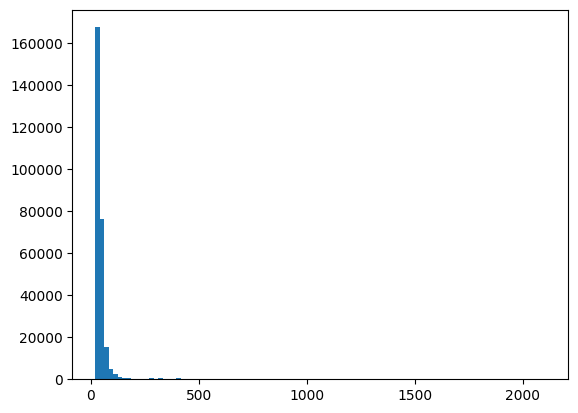

In [22]:
plt.hist(entropy_missed.len, bins=100) 
plt.show() 

In [79]:
false_neg_gff = pd.read_csv("dream_stellar_e0.0267_truth.only.gff", sep = "\t", header = None)
false_neg_gff.drop([1, 2, 6, 7], axis = 1, inplace = True) 
false_neg_gff.columns = ["dname", "begin", "end", "percid", "acc"]
false_neg_gff["len"] = np.abs(false_neg_gff["end"] - false_neg_gff["begin"])
false_neg_gff[['qname','seq2Range', 'evalue', 'cigar', 'mutations']] = false_neg_gff['acc'].str.split(';',expand=True)
false_neg_gff.drop(["cigar", "mutations", "seq2Range", "acc"], axis = 1, inplace = True) 
false_neg_gff = pd.merge(false_neg_gff, chr_map, how="left", on = ["dname"])
false_neg_gff['evalue'] = false_neg_gff['evalue'].str.replace('eValue=', '')
false_neg_gff.evalue = false_neg_gff.evalue.astype(float)
false_neg_gff.head()

,dname,begin,end,percid,len,qname,evalue,chr
0,NC_000067.7,3120571,3120733,97.5460,162,211000022280447,3.259530e-62,1
1,NC_000067.7,3120574,3120739,97.5903,165,211000022280447,7.005910e-64,1
2,NC_000067.7,3120577,3120745,97.6331,168,211000022280447,1.505820e-65,1
3,NC_000067.7,3120577,3120746,97.6470,169,211000022280447,4.186750e-66,1
4,NC_000067.7,3120577,3120746,97.6470,169,211000022280447,4.186750e-66,1


In [80]:
false_neg_gff[false_neg_gff["len"] == np.max(false_neg_gff["len"])]

,dname,begin,end,percid,len,qname,evalue,chr
29601,NC_000075.7,36162193,36162848,97.4397,655,211000022278212,0.0,9
29602,NC_000075.7,36162193,36162848,97.4397,655,211000022278212,0.0,9
29603,NC_000075.7,36162193,36162848,97.4397,655,211000022278212,0.0,9
29604,NC_000075.7,36162193,36162848,97.4397,655,211000022278212,0.0,9
29605,NC_000075.7,36162193,36162848,97.4397,655,211000022278212,0.0,9
29606,NC_000075.7,36162193,36162848,97.4397,655,211000022278212,0.0,9


In [81]:
false_neg_gff[false_neg_gff["evalue"] == np.max(false_neg_gff["evalue"])]

,dname,begin,end,percid,len,qname,evalue,chr
951,NC_000067.7,46735707,46735856,97.3333,149,3R,2.630850e-51,1
22770,NC_000073.7,119523401,119523550,97.3333,149,3R,2.630850e-51,7
22771,NC_000073.7,119523401,119523550,97.3333,149,3R,2.630850e-51,7
22772,NC_000073.7,119523401,119523550,97.3333,149,3R,2.630850e-51,7
22773,NC_000073.7,119523401,119523550,97.3333,149,3R,2.630850e-51,7
22774,NC_000073.7,119523401,119523550,97.3333,149,3R,2.630850e-51,7
22775,NC_000073.7,119523401,119523550,97.3333,149,3R,2.630850e-51,7
22776,NC_000073.7,119523401,119523550,97.3333,149,3R,2.630850e-51,7
22777,NC_000073.7,119523401,119523550,97.3333,149,3R,2.630850e-51,7
22778,NC_000073.7,119523401,119523550,97.3333,149,3R,2.630850e-51,7


In [43]:
np.unique(false_neg_gff.qname)

array(['211000022278032', '211000022278038', '211000022278047',
       '211000022278049', '211000022278074', '211000022278091',
       '211000022278127', '211000022278207', '211000022278212',
       '211000022278244', '211000022278576', '211000022278597',
       '211000022278717', '211000022278768', '211000022278788',
       '211000022279701', '211000022279879', '211000022280350',
       '211000022280440', '211000022280447', '211000022280462', '2R',
       '3R', '4', 'Concatenated', 'Unmapped_Scaffold_58_D1862',
       'Unmapped_Scaffold_8_D1580_D1567', 'Y',
       'Y_mapped_Scaffold_20_D1762_D1719'], dtype=object)

In [6]:
blast_missed = pd.read_csv("blast_e10_k16_vs_e0.0267_false_negatives.length", header=None)
blast_missed.columns = ["len"]
blast_missed.len = np.abs(blast_missed.len)
blast_missed.head()

,len
0,162
1,165
2,168
3,169
4,169


In [7]:
blast_missed[blast_missed.len > 150]

,len
0,162
1,165
2,168
3,169
4,169
...,...
55907,175
55908,169
55909,163
55910,157


In [8]:
np.sum(blast_missed.len) / len(blast_missed.len)

195.92615180998712

# LAST

In [2]:
# cd /srv/data/evelina/mouse
# grep ">" dna4.fasta | sed 's/>//g' | sed 's/,//g' | awk '{print "\"" $1 "\"" ":\t\"" $6 " " $7 "\","}' | grep -v Concatenated | sed 's/unplaced genomic/unplaced scaffold/g'
mouse_dname_d = {"NC_000067.7":	"1",
"NT_166280.1":	"1",
"NT_166281.1":	"1",
"NT_166282.1":	"1",
"NT_162750.1":	"1",
"NT_166338.1":	"1",
"NC_000068.8":	"2",
"NC_000069.7":	"3",
"NC_000070.7":	"4",
"NC_000071.7":	"5",
"NT_187056.1":	"5",
"NT_187057.1":	"5",
"NT_187058.1":	"5",
"NT_166438.1":	"5",
"NT_187059.1":	"5",
"NC_000072.7":	"6",
"NC_000073.7":	"7",
"NT_166307.1":	"7",
"NC_000074.7":	"8",
"NC_000075.7":	"9",
"NC_000076.7":	"10",
"NC_000077.7":	"11",
"NC_000078.7":	"12",
"NC_000079.7":	"13",
"NC_000080.7":	"14",
"NC_000081.7":	"15",
"NC_000082.7":	"16",
"NC_000083.7":	"17",
"NC_000084.7":	"18",
"NC_000085.7":	"19",
"NC_000086.8":	"X",
"NT_165789.3":	"X",
"NC_000087.8":	"Y",
"NT_187060.1":	"Y",
"NT_187061.1":	"Y",
"NT_187062.1":	"Y",
"NT_187063.1":	"Y",
"NT_166451.1":	"unplaced scaffold",
"NT_166462.1":	"unplaced scaffold",
"NT_166465.1":	"unplaced scaffold",
"NT_166466.1":	"unplaced scaffold",
"NT_166467.1":	"unplaced scaffold",
"NT_166469.1":	"unplaced scaffold",
"NT_166474.1":	"unplaced scaffold",
"NT_166476.1":	"unplaced scaffold",
"NT_166478.1":	"unplaced scaffold",
"NT_166443.1":	"unplaced scaffold",
"NT_166444.1":	"unplaced scaffold",
"NT_166480.1":	"unplaced scaffold",
"NT_166456.1":	"unplaced scaffold",
"NT_166471.1":	"unplaced scaffold",
"NT_166473.1":	"unplaced scaffold",
"NT_166454.1":	"unplaced scaffold",
"NT_166463.1":	"unplaced scaffold",
"NT_166450.1":	"unplaced scaffold",
"NT_166452.1":	"unplaced scaffold",
"NT_187064.1":	"unplaced scaffold",
"NW_023337853.1":	"unplaced scaffold",}

mouse_dname_d.get("NT_166473.1")

'unplaced scaffold'

In [29]:
def read_count_table(in_dir, filename):
    df = pd.read_csv(in_dir + "/" + filename, sep = "\t", header = None)
    df.columns = ["count", "dname", "qname"]
    df["chr"] = [mouse_dname_d.get(dname) for dname in df["dname"]]
    return df

def gather_counts(df, col):
    counts = []
    names = np.unique(df[col])
    for name in names:
        counts.append(np.sum(df[df[col] == name]["count"]))

    d = {'names': names, 'counts': counts} 
    return pd.DataFrame(d)

def get_count_df(in_dir):
    fn = read_count_table(in_dir, "fn_count_table.tsv")
    fp = read_count_table(in_dir, "fp_count_table.tsv")
    fp_counts = gather_counts(fp, "chr")
    fn_counts = gather_counts(fn, "chr")
    df = fp_counts.set_index('names').join(fn_counts.set_index('names'), lsuffix='_fp', rsuffix='_fn', on='names')
    df = df.fillna(0)
    df = df.astype({"counts_fp":int, "counts_fn":int})
    return df

In [55]:
in_dir="m100_last_vs_stellar_l50_e2"
df = get_count_df(in_dir)
df.head()

,counts_fp,counts_fn
names,,
1,37,0
10,43,3
11,32,0
12,20,0
13,32,0


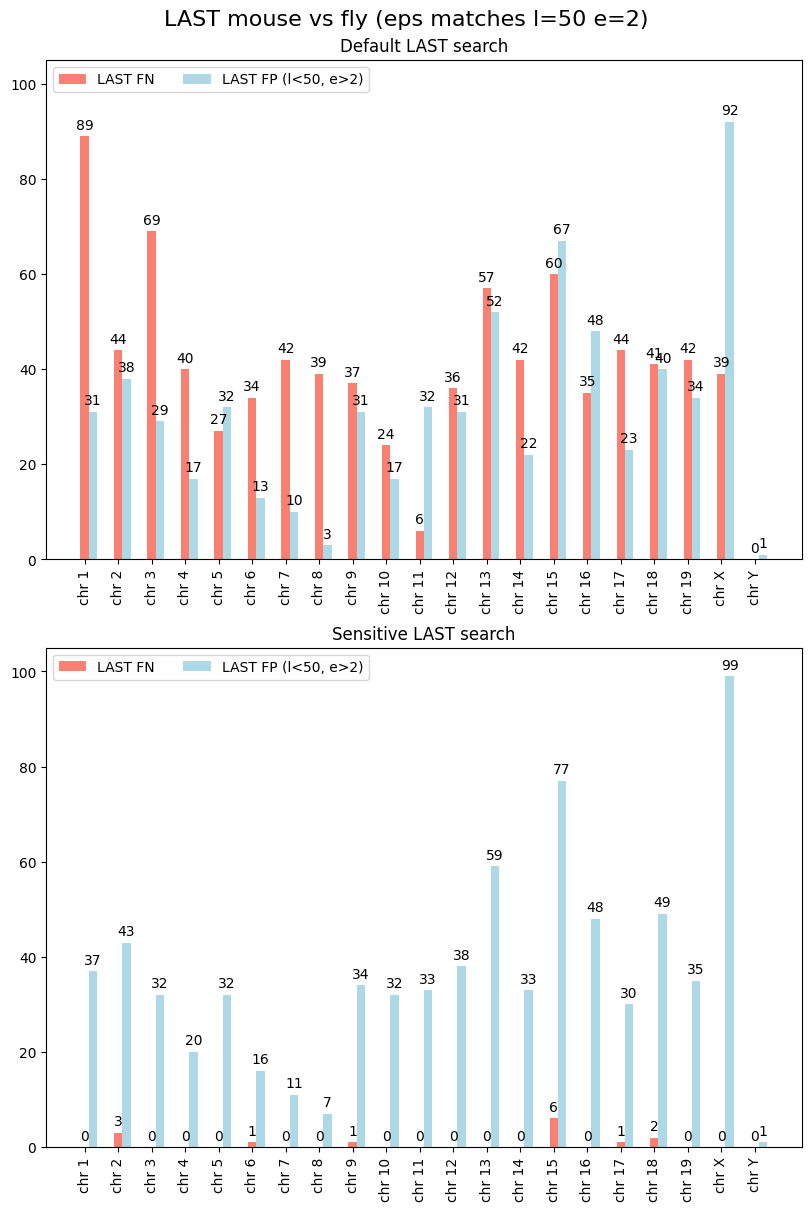

In [70]:
chromosomes = [str(x) for x in range(1, 20)]
chromosomes.append("X")
chromosomes.append("Y")

x = np.arange(len(chromosomes))  # the label locations
width = 0.25  # the width of the bars

def set_ax_plot(ax, df, typename):
    multiplier = 1

    counts = df["counts_fn"].values
    offset = width * multiplier
    rects = ax.bar(x + offset, counts, width, label="LAST FN", color = "salmon")
    ax.bar_label(rects, padding=3)
    multiplier += 1

    counts = df["counts_fp"].values
    offset = width * multiplier
    rects = ax.bar(x + offset, counts, width, label="LAST FP (l<50, e>2)", color = "lightblue")
    ax.bar_label(rects, padding=3)
    multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(typename + ' LAST search')
    ax.set_xticks(x + width, ["chr " + str(x) for x in chromosomes], rotation = 90)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 105)
    
fig, (ax1, ax2) = plt.subplots(2, layout='constrained')
fig.set_figheight(12)
fig.set_figwidth(8)
fig.suptitle('LAST mouse vs fly (eps matches l=50 e=2)', fontsize=16)

in_dir="m10_last_vs_stellar_l50_e2"
df = get_count_df(in_dir)
set_ax_plot(ax1, df, "Default")

in_dir="m100_last_vs_stellar_l50_e2"
df = get_count_df(in_dir)
set_ax_plot(ax2, df, "Sensitive")

plt.savefig('last_search.png', dpi = 250)
plt.show()

# LASTZ

In [ ]:
in_dir="m100_last_vs_stellar_l50_e2"
get_count_df()